## Data Analysis with Python: Zero to Pandas - Course Project Guidelines

### Step 1: Select a real-world dataset 

- Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
- The data should be in CSV format, and should contain at least 3 columns and 150 rows

Here's some sample code for downloading the [US Elections Dataset](https://www.kaggle.com/tunguz/us-elections-dataset):

```
import opendatasets as od
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')
```

### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


### Step 3: Perform exploratory analysis & visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

### Step 4: Ask & answer questions about the data

- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


### Step 6: Make a submission & share your work

- Upload your notebook to your Kaggle profile
- Browse through projects shared by other participants and give feedback


### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.


In [29]:
from scipy.stats import binom
import seaborn as sb
from scipy.stats import skew
import numpy as np
import pandas as pd
import pylab as p
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')

Skipping, found downloaded files in "./us-elections-dataset" (use force=True to force download)


In [31]:
# Change this
data_dir = './us-elections-dataset'

In [32]:
os.listdir(data_dir)

['1976-2020-president.csv', '1976-2020-senate.csv']

In [33]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

## Data Preparation and Cleaning

> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [34]:
us_elections_dataset_president = pd.read_csv(data_dir + '/1976-2020-president.csv')

Here's a summary of the functions & methods we've looked at so far:

* `type` - Type of the dataset
* `pd.head()` - Some starting rows of data
* `pd.tail()` - Some ending rows of data
* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple

In [35]:
type(us_elections_dataset_president)

pandas.core.frame.DataFrame

In [36]:
us_elections_dataset_president.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [37]:
us_elections_dataset_president.tail()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER
4286,2020,WYOMING,WY,56,83,68,US PRESIDENT,UNDERVOTES,NaN,False,1459,278503,20210113,NaN,OTHER


In [38]:
us_elections_dataset_president.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [39]:
us_elections_dataset_president.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,4287.0,0.0
mean,1999.080942,28.616982,53.665034,39.754840,3.119076e+05,2.366924e+06,20210113.0,NaN
std,14.220014,15.616459,26.029189,22.772216,7.648011e+05,2.465008e+06,0.0,NaN
min,1976.000000,1.000000,11.000000,1.000000,0.000000e+00,1.235740e+05,20210113.0,NaN
25%,1988.000000,16.000000,33.000000,22.000000,1.177000e+03,6.522740e+05,20210113.0,NaN
50%,2000.000000,28.000000,53.000000,42.000000,7.499000e+03,1.569180e+06,20210113.0,NaN
75%,2012.000000,41.000000,81.000000,61.000000,1.992415e+05,3.033118e+06,20210113.0,NaN
max,2020.000000,56.000000,95.000000,82.000000,1.111025e+07,1.750088e+07,20210113.0,NaN


In [40]:
us_elections_dataset_president.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')

In [41]:
us_elections_dataset_president.shape

(4287, 15)

<AxesSubplot:>

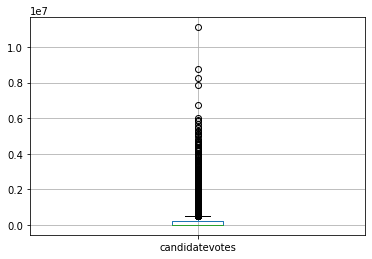

In [42]:
us_elections_dataset_president.boxplot(column='candidatevotes')

Find out the NaN values accross the dataset

In [43]:
pd.isnull(us_elections_dataset_president).sum()[pd.isnull(us_elections_dataset_president).sum() > 0]

candidate          287
party_detailed     456
writein              3
notes             4287
dtype: int64